<a href="https://colab.research.google.com/github/mehmetakifkucuk/googlecolab/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

Summary Information about the variables and their types in the data:
* Surname : The customer surname
* CreditScore : The customer credit score 
* Geography : The country of the customer(Germany/France/Spain)
* Gender : The gender of the customer (Female/Male)
* Age : The age of the customer
* Tenure : The customer's number of years in the in the bank
* Balance : The customer's account balance
* NumOfProducts : The number of bank products that the customer uses
* HasCrCard : Does the customer has a credit card? (0=No,1=Yes)
* IsActiveMember : Does the customer has an active mebership (0=No,1=Yes)
* EstimatedSalary : The estimated salary of the customer
* Exited : Churned or not? (0=No,1=Yes)

# 2. Data Analysis

**2.1 Importing Libraries and Loading Data**

In [1]:
# data analysis libraries:
import numpy as np
import pandas as pd
# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# to ignore warnings:
import sys
if not sys.warnoptions:
    import os, warnings
    warnings.simplefilter("ignore") 
    os.environ["PYTHONWARNINGS"] = "ignore" 

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [2]:
# Importing modelling libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score

In [3]:
# Read train and test data with pd.read_csv():
data = pd.read_csv(r'sample_data/Churn_Modelling.csv')
data.name = 'Data Set'
print('Number of Examples = {}'.format(data.shape[0]))
print(data.name, 'X Shape = {}'.format(data.shape))
print(data.name, 'y Shape = {}\n'.format(data['Exited'].shape[0]))
print(data.columns)

Number of Examples = 110000
Data Set X Shape = (110000, 14)
Data Set y Shape = 110000

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RowNumber        110000 non-null  int64  
 1   CustomerId       110000 non-null  int64  
 2   Surname          110000 non-null  object 
 3   CreditScore      110000 non-null  int64  
 4   Geography        110000 non-null  object 
 5   Gender           110000 non-null  object 
 6   Age              110000 non-null  int64  
 7   Tenure           110000 non-null  int64  
 8   Balance          110000 non-null  float64
 9   NumOfProducts    110000 non-null  int64  
 10  HasCrCard        110000 non-null  int64  
 11  IsActiveMember   110000 non-null  int64  
 12  EstimatedSalary  110000 non-null  float64
 13  Exited           110000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 11.7+ MB
None


In [5]:
data.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
101481,101482,15683748,McGuigan,592,Spain,Male,38,8,0.000,2,1,0,180426.200,0
104859,104860,15747111,White,794,Spain,Female,22,4,114440.240,1,1,1,107753.070,0
9518,9519,15714920,Balashov,585,Germany,Male,44,7,163867.860,1,1,1,112333.220,0
2914,2915,15733883,Ward,604,France,Male,28,7,0.000,2,0,0,58595.640,0
95788,95789,15784566,Roberts,602,France,Female,42,10,0.000,2,0,0,169921.110,1


In [6]:
def missing_values(data):    
    for col in data.columns.tolist():          
        print('{} column missing values: {}'.format(col, data[col].isnull().sum()))

print('{}'.format(data.name), 'missing values:')
missing_values(data)

Data Set missing values:
RowNumber column missing values: 0
CustomerId column missing values: 0
Surname column missing values: 0
CreditScore column missing values: 0
Geography column missing values: 0
Gender column missing values: 0
Age column missing values: 0
Tenure column missing values: 0
Balance column missing values: 0
NumOfProducts column missing values: 0
HasCrCard column missing values: 0
IsActiveMember column missing values: 0
EstimatedSalary column missing values: 0
Exited column missing values: 0


**2.2 Basic summary statistics about the data**

In [7]:
data.iloc[:,2:len(data)].describe([0.1,0.25,0.5,0.75,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,99%,max
CreditScore,110000.000,650.529,96.649,350.000,521.000,584.000,652.000,718.000,850.000,850.000
Age,110000.000,38.922,10.487,18.000,27.000,32.000,37.000,44.000,72.000,92.000
Tenure,110000.000,5.013,2.892,0.000,1.000,3.000,5.000,7.000,10.000,10.000
Balance,110000.000,76485.889,62394.569,0.000,0.000,0.000,97198.540,127644.240,185967.985,250898.090
NumOfProducts,110000.000,1.530,0.582,1.000,1.000,1.000,1.000,2.000,3.000,4.000
HasCrCard,110000.000,0.706,0.456,0.000,0.000,0.000,1.000,1.000,1.000,1.000
IsActiveMember,110000.000,0.515,0.500,0.000,0.000,0.000,1.000,1.000,1.000,1.000
EstimatedSalary,110000.000,100090.240,57507.879,11.580,20273.580,51002.110,100193.915,149388.247,198069.734,199992.480
Exited,110000.000,0.204,0.403,0.000,0.000,0.000,0.000,0.000,1.000,1.000


In [8]:
data[["Geography", "Exited"]].groupby(['Geography'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,Geography,Exited
1,Germany,0.324
2,Spain,0.167
0,France,0.162


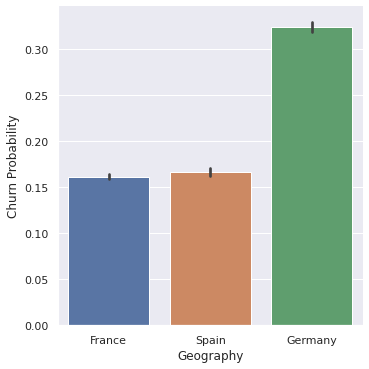

In [9]:
g= sns.catplot(x = "Geography", y = "Exited", data = data, kind = "bar", height = 5)
g.set_ylabels("Churn Probability")
plt.show()

In [11]:
data[["Gender", "Exited"]].groupby(['Gender'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,Gender,Exited
0,Female,0.251
1,Male,0.165


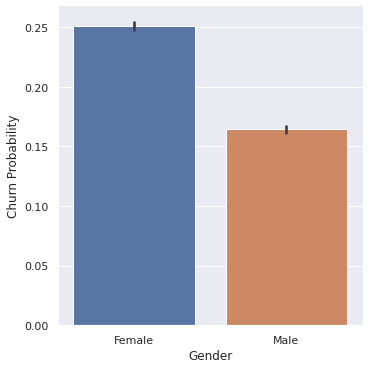

In [12]:
g= sns.catplot(x = "Gender", y = "Exited", data = data, kind = "bar", height = 5)
g.set_ylabels("Churn Probability")
plt.show()

In [13]:
data[["HasCrCard", "Exited"]].groupby(['HasCrCard'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,HasCrCard,Exited
0,0,0.208
1,1,0.202


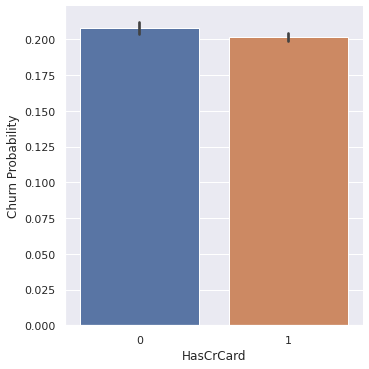

In [14]:
g= sns.catplot(x = "HasCrCard", y = "Exited", data = data, kind = "bar", height = 5)
g.set_ylabels("Churn Probability")
plt.show()

In [15]:
data[["IsActiveMember", "Exited"]].groupby(['IsActiveMember'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,IsActiveMember,Exited
0,0,0.269
1,1,0.143


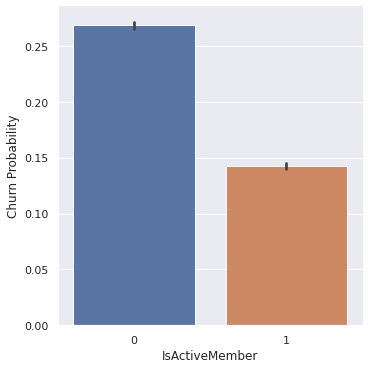

In [16]:
g= sns.catplot(x = "IsActiveMember", y = "Exited", data = data, kind = "bar", height = 5)
g.set_ylabels("Churn Probability")
plt.show()

In [17]:
data[["NumOfProducts", "Exited"]].groupby(['NumOfProducts'], as_index=False).mean().sort_values(by='Exited', ascending=False)

,NumOfProducts,Exited
3,4,1.000
2,3,0.827
0,1,0.277
1,2,0.076


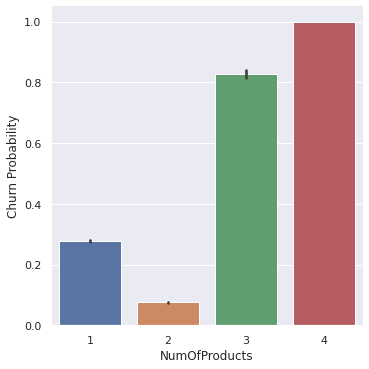

In [18]:
g= sns.catplot(x = "NumOfProducts", y = "Exited", data = data, kind = "bar", height = 5)
g.set_ylabels("Churn Probability")
plt.show()

2.3 Correlation matrix

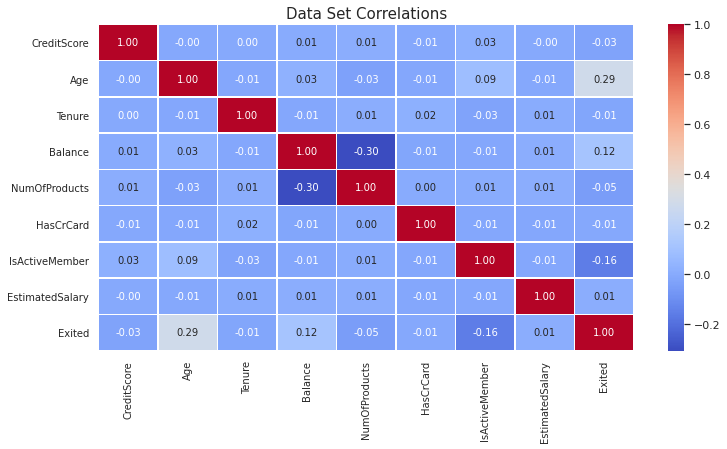

In [19]:
fig, axs = plt.subplots(figsize=(12, 6))

sns.heatmap(data.drop(['CustomerId', 'RowNumber'], axis=1).corr(), ax=axs, annot=True, fmt = ".2f", linewidths=0.5, cmap='coolwarm')

axs.tick_params(axis='x', labelsize=10)
axs.tick_params(axis='y', labelsize=10)

axs.set_title('Data Set Correlations', size=15)

plt.show()

# 3. Data Preprocessing

In [20]:
data.drop("RowNumber", axis = 1, inplace = True)
data.drop("Surname", axis = 1, inplace = True)
data.drop("CustomerId", axis = 1, inplace = True)

In [21]:
data.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3266,537,Spain,Male,30,1,103138.170,1,1,1,96555.420,0
47113,733,France,Female,24,3,161884.990,1,1,1,9617.240,0
48814,740,France,Female,51,4,0.000,2,1,1,178929.840,0
82177,667,France,Female,24,4,0.000,2,0,1,34335.550,0
79637,790,France,Female,31,2,151290.160,1,1,1,172437.120,0


3.1 Label encoding of gender variable

In [22]:
enc = LabelEncoder()
data['Gender'] = enc.fit_transform(data['Gender'])

3.2 One hot encoding of Geography (Country)

In [23]:
data = pd.get_dummies(data, columns = ['Geography'])

3.3 Splitting the data as train and Test data

In [24]:
train = data.sample(frac = 0.8)

test = data.drop(train.index)

In [25]:
all_data = pd.concat((train.loc[:,:],test.loc[:,:]))
target = all_data.Exited
all_data.drop("Exited", axis = 1, inplace = True)

3.4 Scaling Features in [0,1] range

In [26]:
dataEx = MinMaxScaler().fit_transform(all_data)

In [27]:
x_train = dataEx[:train.shape[0]]
x_test = dataEx[train.shape[0]:]

y_train = train.Exited
y_test = test.Exited

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((88000, 12), (88000,), (22000, 12), (22000,))

# 4. Modeling

4.1 Test Set Accuracy for the default models

In [28]:
r=1000
models = [LogisticRegression(random_state=r),GaussianNB(), KNeighborsClassifier(),
          SVC(random_state=r,probability=True),DecisionTreeClassifier(random_state=r),
          RandomForestClassifier(random_state=r), GradientBoostingClassifier(random_state=r)]
names = ["LogisticRegression","GaussianNB","KNN","SVC",
             "DecisionTree","Random_Forest","GBM"]

In [ ]:
print('Default model test accuracies for the train data:', end = "\n")
print('_____________________________________________________________________________________________________')
for name, model in zip(names, models):
    model.fit(x_train, y_train)
    print(name, ': Train set accuracy :', "%.3f" % round(model.score(x_train, y_train)*100, 2))
    y_pred = model.predict(x_test) 
    print('Test set accuracy :',"%.3f" % round(accuracy_score(y_pred, y_test)*100, 2))
    print('_____________________________________________________________________________________________________')

Default model test accuracies for the train data:
_____________________________________________________________________________________________________
LogisticRegression : Train set accuracy : 81.110
Test set accuracy : 80.760
_____________________________________________________________________________________________________
GaussianNB : Train set accuracy : 81.880
Test set accuracy : 81.730
_____________________________________________________________________________________________________
KNN : Train set accuracy : 100.000
Test set accuracy : 100.000
_____________________________________________________________________________________________________


4.2 Cross validation accuracy and std of the default models for all data

In [ ]:
predictors=dataEx

In [ ]:
results = []
print('10 fold Cross validation accuracy and std of the default models for all data:', end = "\n")
print('_____________________________________________________________________________________________________')
for name, model in zip(names, models):
    kfold = KFold(shuffle=True, n_splits=10, random_state=1000)
    cv_results = cross_val_score(model, predictors, target, cv = kfold, scoring = "accuracy")
    results.append(cv_results)
    print("{}: {} ({})".format(name, "%.3f" % round(cv_results.mean()*100, 2) , "%.3f" %  cv_results.std()))
    print('_____________________________________________________________________________________________________')

10 fold Cross validation accuracy and std of the default models for all data:
_____________________________________________________________________________________________________
LogisticRegression: 81.070 (0.012)
_____________________________________________________________________________________________________
GaussianNB: 81.870 (0.016)
_____________________________________________________________________________________________________
KNN: 81.580 (0.013)
_____________________________________________________________________________________________________
SVC: 84.050 (0.011)
_____________________________________________________________________________________________________
DecisionTree: 79.000 (0.013)
_____________________________________________________________________________________________________
Random_Forest: 86.270 (0.009)
_____________________________________________________________________________________________________
GBM: 86.600 (0.010)
___________________________